In [84]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
from scipy import stats

In [43]:
evictions = pd.read_csv("Eviction_Notices.csv")

In [5]:
evictions.head()

,Eviction ID,Address,City,State,Eviction Notice Source Zipcode,File Date,Non Payment,Breach,Nuisance,Illegal Use,...,:@computed_region_fyvs_ahh9,:@computed_region_p5aj_wyqh,:@computed_region_rxqg_mtj9,:@computed_region_yftq_j783,:@computed_region_bh8s_q3mv,:@computed_region_9jxd_iqea,:@computed_region_6ezc_tdp2,:@computed_region_6pnf_4xz7,:@computed_region_h4ep_8xdi,Fix It Zones as of 2018-02-07
0,M200260,2800 Block Of 24th Street,San Francisco,CA,94110,02/12/2020,False,False,False,False,...,19.0,4.0,7.0,2.0,28859.0,NaN,NaN,1.0,NaN,NaN
1,M200159,400 Block Of Fillmore Street,San Francisco,CA,94117,01/28/2020,True,False,False,False,...,10.0,9.0,11.0,15.0,29492.0,NaN,NaN,1.0,NaN,NaN
2,M200271,700 Block Of Wisconsin Street,San Francisco,CA,94107,02/11/2020,False,False,False,False,...,29.0,3.0,8.0,10.0,28856.0,NaN,NaN,1.0,NaN,NaN
3,M200202,300 Block Of Serrano Drive,San Francisco,CA,94132,02/05/2020,False,True,False,False,...,14.0,8.0,4.0,1.0,64.0,NaN,NaN,2.0,NaN,NaN
4,M200169,2300 Block Of 25th Avenue,San Francisco,CA,94116,01/21/2020,False,False,False,False,...,35.0,8.0,3.0,1.0,29491.0,NaN,NaN,1.0,NaN,24.0


In [44]:
evictions = evictions[['Address', 'Eviction Notice Source Zipcode', 'File Date','Non Payment', 'Breach',
       'Nuisance', 'Illegal Use', 'Failure to Sign Renewal', 'Access Denial',
       'Unapproved Subtenant', 'Owner Move In', 'Demolition',
       'Capital Improvement', 'Substantial Rehab', 'Ellis Act WithDrawal',
       'Condo Conversion', 'Roommate Same Unit', 'Other Cause',
       'Late Payments', 'Lead Remediation', 'Development',
       'Good Samaritan Ends', 'Neighborhoods - Analysis Boundaries']]

In [45]:
evictions['Year'] = evictions['File Date'].apply(lambda x: x[6:])

In [21]:
evictions.head()

,Address,Eviction Notice Source Zipcode,File Date,Non Payment,Breach,Nuisance,Illegal Use,Failure to Sign Renewal,Access Denial,Unapproved Subtenant,...,Ellis Act WithDrawal,Condo Conversion,Roommate Same Unit,Other Cause,Late Payments,Lead Remediation,Development,Good Samaritan Ends,Analysis Neighborhoods,Year
0,2800 Block Of 24th Street,94110,02/12/2020,False,False,False,False,False,False,False,...,False,False,True,False,False,False,False,False,20.0,2020
1,400 Block Of Fillmore Street,94117,01/28/2020,True,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,9.0,2020
2,700 Block Of Wisconsin Street,94107,02/11/2020,False,False,False,False,False,False,False,...,True,False,False,False,False,False,False,False,26.0,2020
3,300 Block Of Serrano Drive,94132,02/05/2020,False,True,False,False,False,False,False,...,False,False,False,False,False,False,False,False,16.0,2020
4,2300 Block Of 25th Avenue,94116,01/21/2020,False,False,False,False,False,False,False,...,True,False,False,False,False,False,False,False,35.0,2020


In [ ]:
#first aggregate by month 
#need total for month and area 

In [46]:
evictions['MonthDate'] = pd.to_datetime(evictions['File Date']).dt.to_period('M').dt.to_timestamp()

In [72]:
test = evictions.groupby(['MonthDate', 'Neighborhoods - Analysis Boundaries']).count()['Address']

In [76]:
test.head()

MonthDate   Neighborhoods - Analysis Boundaries
1997-01-01  Bayview Hunters Point                  1
            Bernal Heights                         7
            Castro/Upper Market                    9
            Chinatown                              1
            Excelsior                              3
Name: Address, dtype: int64

In [80]:
test2 = test.reset_index()

In [93]:
test2['Number of Evictions'] = test2['Address']

In [97]:
test2.head()

,MonthDate,Neighborhoods - Analysis Boundaries,Address,Number of Evictions
0,1997-01-01,Bayview Hunters Point,1,1
1,1997-01-01,Bernal Heights,7,7
2,1997-01-01,Castro/Upper Market,9,9
3,1997-01-01,Chinatown,1,1
4,1997-01-01,Excelsior,3,3


In [118]:
number_ev = test2.groupby('Neighborhoods - Analysis Boundaries')['Number of Evictions'].sum().reset_index()

In [104]:
boundaries = ['Castro/Upper Market', 'Haight Ashbury', 'Hayes Valley', 'Lakeshore', 'Mission', 'Nob Hill', 'Outer Richmond', 'Tenderloin', 'South of Market']

In [107]:
test3 = test2[test2['Neighborhoods - Analysis Boundaries'].isin(boundaries)]
test3['Date'] = test3['MonthDate']

/srv/app/venv/lib/python3.6/site-packages/ipykernel_launcher.py:2: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy



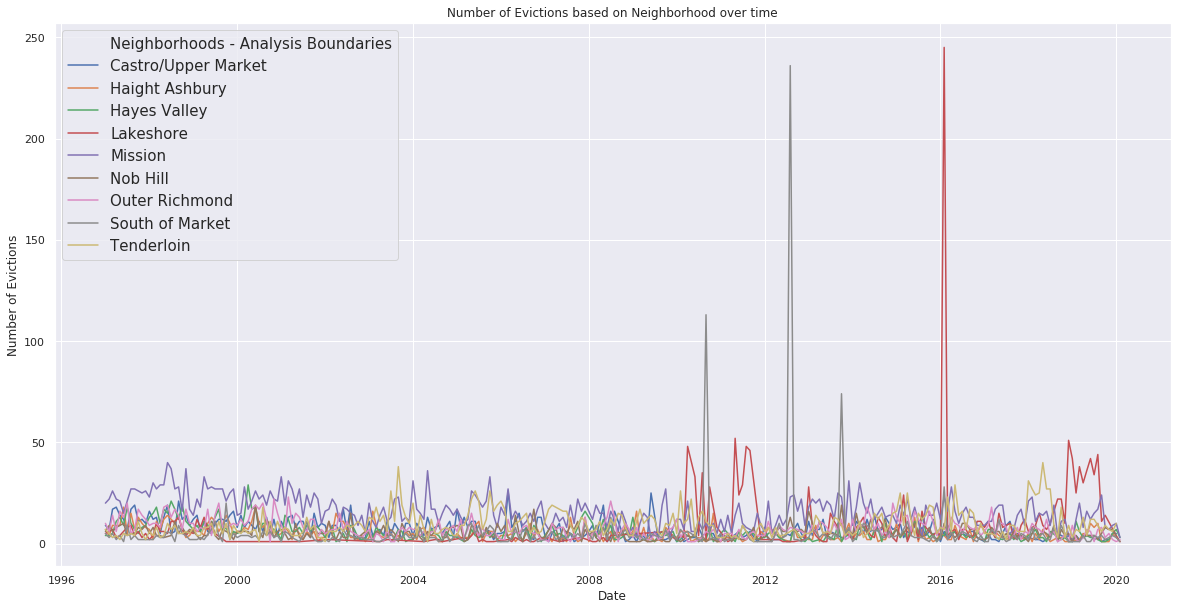

In [138]:
plt.figure(figsize=(20,10)) 
sns.lineplot(data =test3, x = 'Date', y= 'Number of Evictions', hue ='Neighborhoods - Analysis Boundaries')
plt.legend(loc=2, prop={'size': 15})
plt.title('Number of Evictions based on Neighborhood over time');

In [121]:
number_ev.head()

,Neighborhoods - Analysis Boundaries,Number of Evictions
0,Bayview Hunters Point,1129
1,Bernal Heights,1196
2,Castro/Upper Market,1844
3,Chinatown,442
4,Excelsior,1250


''

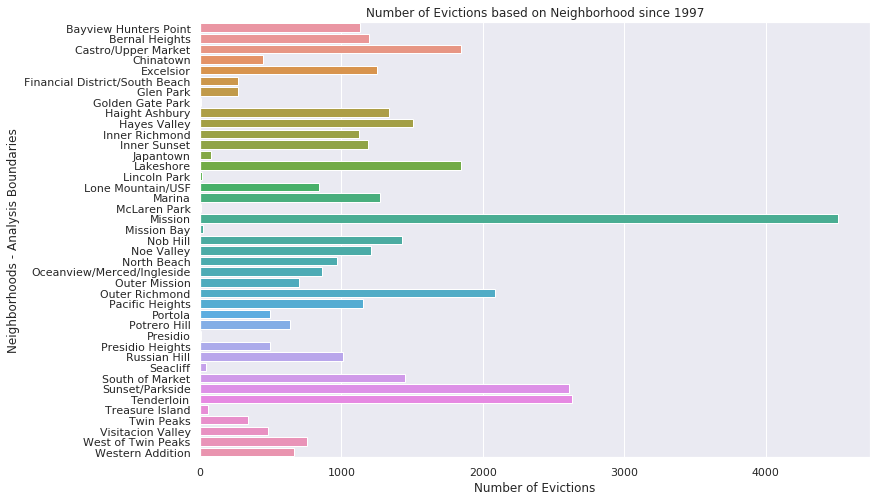

In [135]:
plt.figure(figsize=(12,8))
sns.barplot(data = number_ev, y = 'Neighborhoods - Analysis Boundaries', x = 'Number of Evictions', orient = 'h')
plt.title('Number of Evictions based on Neighborhood since 1997')
;